In [1]:
# Created: 20250104

In [2]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [8]:
# !pip install mplfinance

In [9]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


ValueError: O,H,L,C must have the same amount of missing data!

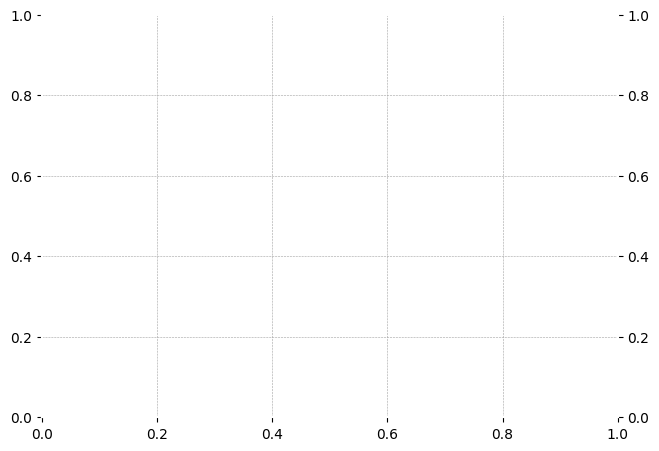

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2023-12-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Heikin Ashi Candles
def calculate_heikin_ashi(data):
    ha_data = data[['Open', 'High', 'Low', 'Close']].copy()
    
    ha_data['HA Close'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4
    ha_data['HA Open'] = (data['Open'].shift(1) + data['Close'].shift(1)) / 2
    ha_data['HA High'] = ha_data[['High', 'HA Open', 'HA Close']].max(axis=1)
    ha_data['HA Low'] = ha_data[['Low', 'HA Open', 'HA Close']].min(axis=1)
    
    return ha_data[['HA Open', 'HA High', 'HA Low', 'HA Close']]

# Apply Heikin Ashi calculation
ha_data = calculate_heikin_ashi(data)

# Step 3: Plot Heikin Ashi Candles
ha_candles = ha_data.rename(columns={'HA Open': 'open', 'HA High': 'high', 'HA Low': 'low', 'HA Close': 'close'})
mpf.plot(ha_candles, type='candle', style='charles', title=f'{symbol} Heikin Ashi Candles', ylabel='Price', ylabel_lower='Volume')


In [4]:
def show_graph(symbol):

pass

In [5]:
show_graph("AMZN")

NameError: name 'show_graph' is not defined